In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, Dropout, BatchNormalization, LSTM, ConvLSTM2D
from keras.losses import categorical_crossentropy


Num GPUs Available:  0


In [2]:
train_path = r"path_to_train_data"
test_path = r"path_to_test_data"
image_size = (150, 150)

batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 14034 images belonging to 6 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 3000 images belonging to 6 classes.


In [5]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label in in train and validation datasets\n")

for key, value in labels.items():
    print(f'{key} : {value}')

Label in in train and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [9]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break


Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 6)


In [10]:
model.add(Dense(6, activation='softmax'))


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience = 5, min_lr =1e-6, verbose=1)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))  # Assuming you have 6 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,
    verbose=1
)


Epoch 1/30


438/438 [==============================] - 422s 953ms/step - loss: 1.1566 - accuracy: 0.6221 - val_loss: 1.5153 - val_accuracy: 0.5276
Epoch 2/30
438/438 [==============================] - 342s 780ms/step - loss: 0.7396 - accuracy: 0.7377 - val_loss: 2.0039 - val_accuracy: 0.4671
Epoch 3/30
438/438 [==============================] - 329s 751ms/step - loss: 0.6140 - accuracy: 0.7765 - val_loss: 0.7381 - val_accuracy: 0.7554
Epoch 4/30
438/438 [==============================] - 337s 769ms/step - loss: 0.5505 - accuracy: 0.8048 - val_loss: 0.9601 - val_accuracy: 0.6872
Epoch 5/30
438/438 [==============================] - 333s 760ms/step - loss: 0.5038 - accuracy: 0.8178 - val_loss: 1.1458 - val_accuracy: 0.6186
Epoch 6/30
438/438 [==============================] - 333s 759ms/step - loss: 0.4760 - accuracy: 0.8313 - val_loss: 1.0641 - val_accuracy: 0.6757
Epoch 7/30
438/438 [==============================] - 337s 768ms/step - loss: 0.4428 - accuracy: 0.8396 - val_loss: 0.6523

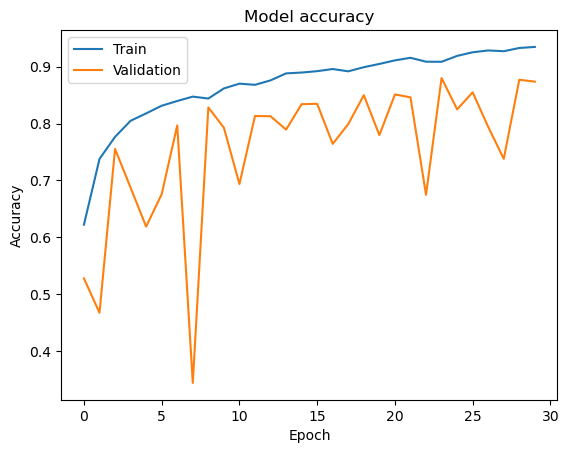

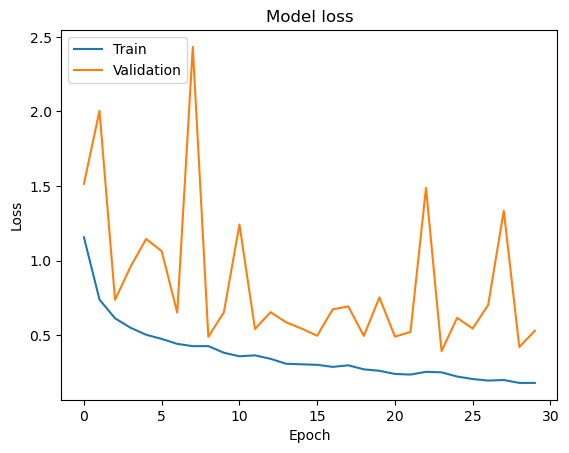

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [16]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Found 3000 images belonging to 6 classes.
94/94 [==============================] - 11s 120ms/step - loss: 0.5326 - accuracy: 0.8733
Test Accuracy: 87.33%
Test Loss: 0.5326


Text(0, 0.5, 'Loss')

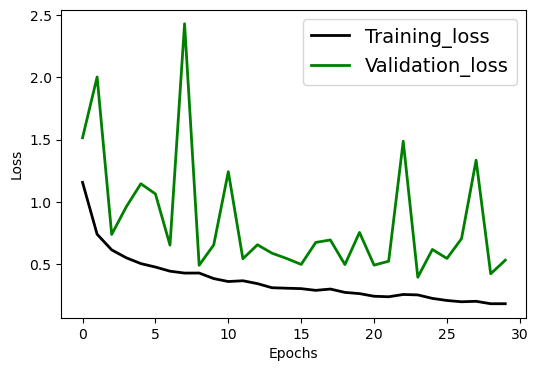

In [17]:
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training_loss', 'Validation_loss'],fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)

In [18]:
test_predictions = model.predict(validation_generator)
test_predictions_classes = np.where(test_predictions > 0.5, 1, 0)

94/94 [==============================] - 13s 137ms/step


In [20]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report  

model.save_weights('model_weights.h5')



# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions for the test set
test_predictions = model.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes

# Display the confusion matrix
conf_mat = confusion_matrix(test_true_classes, test_pred_classes)
print("Confusion Matrix:")
print(conf_mat)

# Display classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(test_true_classes, test_pred_classes, target_names=class_labels))

Found 3000 images belonging to 6 classes.
94/94 [==============================] - 12s 124ms/step - loss: 0.5326 - accuracy: 0.8733
Test Accuracy: 87.33%
Test Loss: 0.5326
94/94 [==============================] - 11s 120ms/step
Confusion Matrix:
[[382   3   3   3   8  38]
 [  2 467   1   2   2   0]
 [ 16   5 463  50  17   2]
 [ 10   5  70 415  23   2]
 [  7   4  34   7 455   3]
 [ 35  18   2   2   6 438]]
Classification Report:
              precision    recall  f1-score   support

   buildings       0.85      0.87      0.86       437
      forest       0.93      0.99      0.96       474
     glacier       0.81      0.84      0.82       553
    mountain       0.87      0.79      0.83       525
         sea       0.89      0.89      0.89       510
      street       0.91      0.87      0.89       501

    accuracy                           0.87      3000
   macro avg       0.87      0.88      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [21]:
model.evaluate(validation_generator)

94/94 [==============================] - 12s 122ms/step - loss: 0.5326 - accuracy: 0.8733


[0.5325540900230408, 0.8733333349227905]

In [22]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

#import torchvision.transforms as transforms
#import torchvision.datasets as datasets

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [33]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [35]:
conda install opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hp\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.11.17         |  py311haa95532_0         160 KB
    eigen-3.4.0                |       h59b6b97_0         1.1 MB
    ffmpeg-4.2.2               |       he774522_0        17.6 MB
    gst-plugins-base-1.18.5    |       h9e645db_0         1.7 MB
    gstreamer-1.18.5           |       hd78058f_0         1.7 MB
    libogg-1.3.5               |       h2bbff1b_1          33 KB
    libvorbis-1.3.7            |       he774522_0         202 KB
    opencv-4.6.0               |  py311h5d08a89_5        29.9 MB
    openssl-3.0.12             |       h2bbff1b_0         7.4 MB
    ------------------------------------------------------------
                                           Total:        5



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [24]:
import os
import matplotlib.pyplot as plt
import cv2

train_path = r"D://Machine Learning//seg_train/seg_train"
classes = os.listdir(train_path)
classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

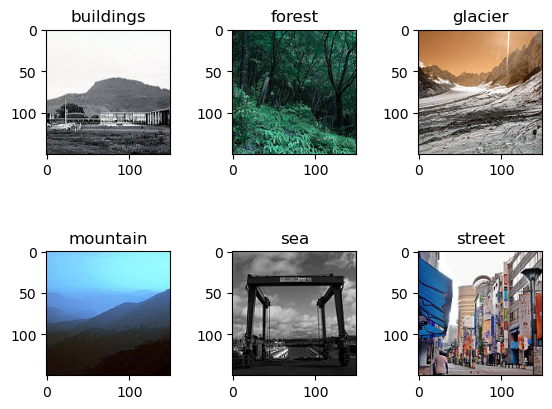

In [25]:
class_weight = [] 
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for c in classes : 
    class_path = os.path.join(train_path , c) 
    img_path = os.path.join ( class_path , os.listdir(class_path)[0]) 
    class_weight.append (len(os.listdir(class_path)) )
    img = cv2.imread (img_path) 
    plt.subplot(2 , 3 , classes.index(c)+1 ) 
    plt.title (c)
    plt.imshow(img)

Text(0, 0.5, 'number of images')

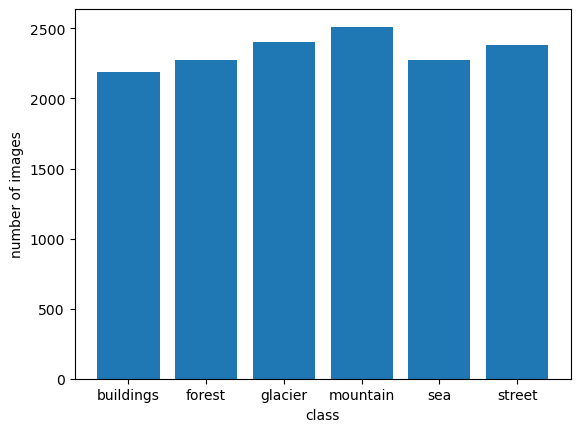

In [26]:
plt.bar(classes, class_weight)    
plt.xlabel("class")
plt.ylabel("number of images" )

In [42]:
pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/13/24/23cdf7e7dc33e5c01588c315f8424d31afa9edb05a80168f3d44f7178ff7/torchvision-0.16.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 163.8 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.1 MB 163.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.1 MB 204.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.1 MB 255.1 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.1 MB 297.7 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/